In [264]:
# Import needed libraries

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import random
import sklearn
import numpy as np
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import os

In [265]:
# Some Basic Characteristics
random.seed = 42
tf.random.set_seed(42)

im_num_rd = random.randint(0, x_train.shape[0])
im_num_rd

OUTPUT_PATH = 'output/'
MODEL_NAME_ANN = 'ANN-784-64-64-10'
MODEL_NAME_CNN = 'CNN-LeNet5'

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [266]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (60000, 28, 28)
Test: (10000, 28, 28)


In [267]:
# Look through an image
x_train[im_num_rd]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

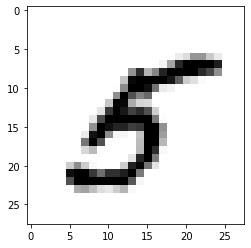

In [268]:
# Show an image
plt.imshow(x_train[im_num_rd], cmap=plt.cm.gray_r)

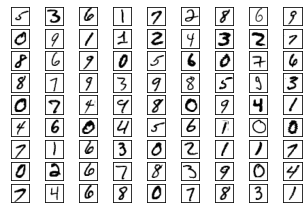

In [269]:
# METHOD: show multiple images to look through the dataset
def plot_images(images, file_name = None, r=10, c=10):
    fig = plt.figure()

    for i in range(1, r):
        for j in range(1, c):
            axs = fig.add_subplot(r,c,(i-1)*c+j)
            axs.set_xticks([])
            axs.set_yticks([])
            axs.imshow(images[(10*i)+j].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.show()
    if file_name is not None:
        fig.savefig(os.path.join(OUTPUT_PATH, file_name + '.jpg'))
        
plot_images(x_train, '100-images')

In [270]:
# Clean data
x_train = x_train.astype(float) # Change data type of x_train
x_test = x_test.astype(float) # Change data type of x_test
x_train /= 255 # Normalize pixel values
x_test /= 255 # Normalize pixel values

y_train = to_categorical(y_train) # OneHotEncoding for y_train
y_test = to_categorical(y_test) # OneHotEncoding for y_test

print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

y_train (60000, 10)
y_test (10000, 10)


In [271]:
# Specify hyperparameters for ANN and CNN
EPOCHS = 200
callback = EarlyStopping(monitor='loss', min_delta=0.01, patience=5)
POOL_CHOICE = layers.AveragePooling2D
PADDING_CHOICE = 'valid'
KERNEL_SIZE = (5,5)
POOL_SIZE = (2,2)
ACT_FUNC = keras.activations.relu
OPT = keras.optimizers.Adam
LOSS_FUNC = keras.losses.categorical_crossentropy
METRICS = ['accuracy',
          'mse', 'mae']
#keras.metrics.Precision(), keras.metrics.Recall()

In [272]:
# Define structure of the ANN with structure 784-64-64-10
keras.backend.clear_session()    
model_ANN = models.Sequential(name = MODEL_NAME_ANN)

model_ANN.add(layers.Dense(64, input_shape = (784,), activation=ACT_FUNC))
model_ANN.add(layers.Dense(64, activation=ACT_FUNC))
model_ANN.add(layers.Dense(10, activation='softmax'))

model_ANN.compile(optimizer = OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_ANN.summary()

Model: "ANN-784-64-64-10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [273]:
# Define structure of the CNN with LeNet-5 architecture
keras.backend.clear_session()
model_CNN = models.Sequential(name = MODEL_NAME_CNN)

model_CNN.add(layers.Conv2D(filters=6,  kernel_size=KERNEL_SIZE, padding='same', activation=ACT_FUNC, input_shape=(28, 28, 1)))
model_CNN.add(POOL_CHOICE(pool_size=POOL_SIZE))

model_CNN.add(layers.Conv2D(filters=16, kernel_size=KERNEL_SIZE, padding='valid', activation=ACT_FUNC))
model_CNN.add(POOL_CHOICE(pool_size=POOL_SIZE))

model_CNN.add(layers.Conv2D(filters=120, kernel_size=KERNEL_SIZE, padding='valid', activation=ACT_FUNC))
model_CNN.add(layers.Flatten())

model_CNN.add(layers.Dense(84, activation=ACT_FUNC))
model_CNN.add(layers.Dense(10, activation="softmax"))

model_CNN.compile(optimizer = OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_CNN.summary()

Model: "CNN-LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [274]:
training_history_ANN = model_ANN.fit(x_train.reshape(x_train.shape[0], 784), y_train, epochs = EPOCHS, shuffle = True, callbacks=[callback], verbose=1)

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2725 - accuracy: 0.9199 - mse: 0.0121 - mae: 0.0274
Epoch 2/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1201 - accuracy: 0.9640 - mse: 0.0055 - mae: 0.0119
Epoch 3/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0899 - accuracy: 0.9721 - mse: 0.0043 - mae: 0.0090
Epoch 4/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0701 - accuracy: 0.9780 - mse: 0.0033 - mae: 0.0070
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0573 - accuracy: 0.9823 - mse: 0.0028 - mae: 0.0058
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0492 - accuracy: 0.9845 - mse: 0.0024 - mae: 0.0050: 0s - loss: 0.0490 - accuracy: 0.9845 - mse: 0.0024 - mae: 0.00
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0408 - accuracy: 0.9864 - mse: 0.0021 - mae: 0.0043
Epoch 8/200
1875/18

In [275]:
training_history_CNN = model_CNN.fit(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train, epochs = EPOCHS, shuffle = True, callbacks=[callback], verbose=1)

Epoch 1/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2181 - accuracy: 0.9327 - mse: 0.0100 - mae: 0.0215
Epoch 2/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0723 - accuracy: 0.9773 - mse: 0.0034 - mae: 0.0072
Epoch 3/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0513 - accuracy: 0.9834 - mse: 0.0025 - mae: 0.0051
Epoch 4/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0396 - accuracy: 0.9877 - mse: 0.0019 - mae: 0.0039
Epoch 5/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0322 - accuracy: 0.9900 - mse: 0.0016 - mae: 0.0032
Epoch 6/200
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0267 - accuracy: 0.9915 - mse: 0.0013 - mae: 0.0026
Epoch 7/200
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0235 - accuracy: 0.9925 - mse: 0.0012 - mae: 0.0023
Epoch 8/200
1875/1875 [==============================] - ETA: 0s - lo

In [311]:
"""
METHOD: Show metrics obtained during each epoch in training
The metrics are the following:
Loss - Categorical Crossentropy
Accuracy - rate of the accurate/true predictions over all predictions
MSE - Mean Squared Error
MAE - Mean Absolute Error
"""
def plot_training_history(training_history, file_name = None):
    loss_history = training_history.history['loss']
    acc_history = training_history.history['accuracy']
    mse_history = training_history.history['mse']
    mae_history = training_history.history['mae']

    # Define plot size, approximately 1024x1024 pixels 
    dpi = 300
    num_of_pixels = 1024
    num_of_inches = num_of_pixels / dpi
    cm = num_of_inches * 2.54

    plt.gcf().set_dpi(dpi)
    fig = plt.figure(figsize=(cm,cm))
    plt.subplots_adjust(hspace=0.3)
    
    axs11 = fig.add_subplot(2,2,1)
    axs12 = fig.add_subplot(2,2,2)
    axs21 = fig.add_subplot(2,2,3)
    axs22 = fig.add_subplot(2,2,4)
    
    fig.suptitle('Training Metrics - ' + file_name if file_name is not None else '')

    x_ticks = np.arange(1, len(loss_history), 2)
    for axs in (axs11, axs12, axs21, axs22):
        axs.set_xlabel('epochs')
        axs.set_xticks(x_ticks)
        
    axs11.plot(loss_history)
    axs11.set_title('Loss')
    axs12.plot(acc_history)
    axs12.set_title('Accuracy')
    axs21.plot(mse_history)
    axs21.set_title('MSE')
    axs22.plot(mae_history)
    axs22.set_title('MAE')

    plt.show()
    # Save the figure as an image if specified 
    if file_name is not None:
        fig.savefig(os.path.join(OUTPUT_PATH, 'Training Metrics - ' + file_name + '.jpg'))

<Figure size 1800x1200 with 0 Axes>

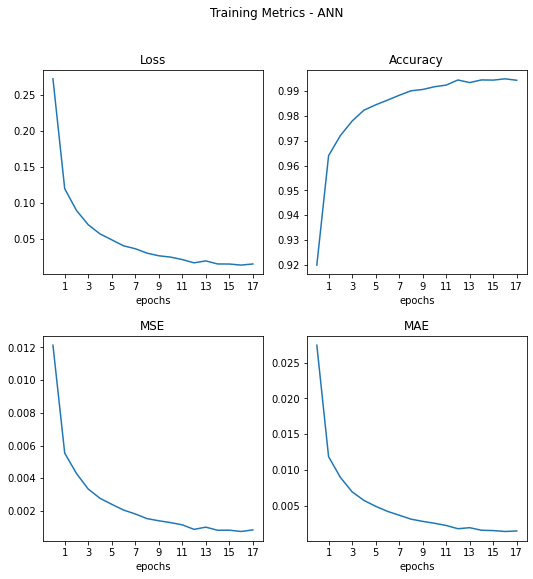

In [312]:
plot_training_history(training_history_ANN, 'ANN')

<Figure size 1800x1200 with 0 Axes>

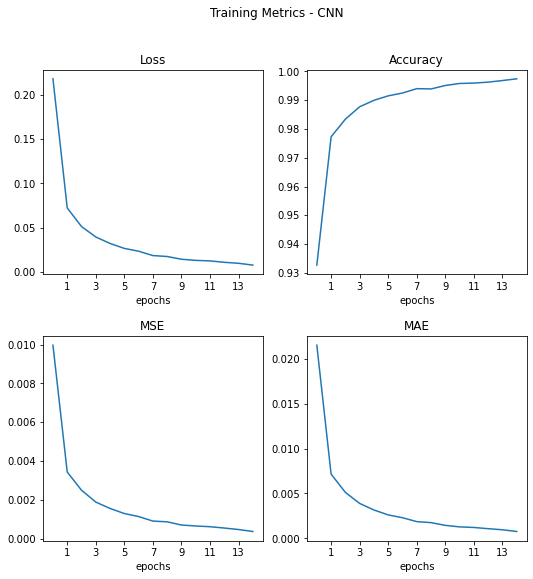

In [313]:
plot_training_history(training_history_CNN, 'CNN')

In [314]:
class LengthsDoNotMatchException(Exception):
    def __init__(self, length1, length2):
        message = f'Lengths of arrays do not match: {length1} vs {length2}'
        super().__init__(message)

"""
METHOD: Show metrics obtained during each epoch in training WITH COMPARISONS OVER DIFFERENT MODELS
The metrics are the following:
Loss - Categorical Crossentropy
Accuracy - rate of the accurate/true predictions over all predictions
MSE - Mean Squared Error
MAE - Mean Absolute Error
"""
def plot_training_histories(training_histories, model_names, file_name = None):
    if len(training_histories) != len(model_names):
        raise LengthsDoNotMatchException(len(training_histories), len(model_names))
    
    loss_histories, acc_histories, mse_histories, mae_histories = [], [], [], []
    for i in range(len(training_histories)):
        loss_histories.append(training_histories[i].history['loss'])
        acc_histories.append(training_histories[i].history['accuracy'])
        mse_histories.append(training_histories[i].history['mse'])
        mae_histories.append(training_histories[i].history['mae'])

    # Define plot size, approximately 1024x1024 pixels 
    dpi = 300
    num_of_pixels = 1024
    num_of_inches = num_of_pixels / dpi
    cm = num_of_inches * 2.54

    plt.gcf().set_dpi(dpi)
    fig = plt.figure(figsize=(cm,cm))
    plt.subplots_adjust(hspace=0.3)
    
    axs11 = fig.add_subplot(2,2,1)
    axs12 = fig.add_subplot(2,2,2)
    axs21 = fig.add_subplot(2,2,3)
    axs22 = fig.add_subplot(2,2,4)
    
    fig.suptitle('Training Metrics - ' + file_name if file_name is not None else '')

    x_ticks = np.arange(1, len(loss_history), 2)
    for axs in (axs11, axs12, axs21, axs22):
        axs.set_xlabel('epochs')
        axs.set_xticks(x_ticks)
        
    for i in range(len(training_histories)):
        axs11.plot(loss_histories[i], label = model_names[i])
        axs12.plot(acc_histories[i], label = model_names[i])
        axs21.plot(mse_histories[i], label = model_names[i])
        axs22.plot(mae_histories[i], label = model_names[i])
    
    axs11.set_title('Loss')
    axs12.set_title('Accuracy')
    axs21.set_title('MSE')
    axs22.set_title('MAE')
    
    axs11.legend()
    axs12.legend()
    axs21.legend()
    axs22.legend()
    
    plt.show()
    # Save the figure as an image if specified 
    if file_name is not None:
        fig.savefig(os.path.join(OUTPUT_PATH, 'Training Metrics - ' + file_name + '.jpg'))

<Figure size 1800x1200 with 0 Axes>

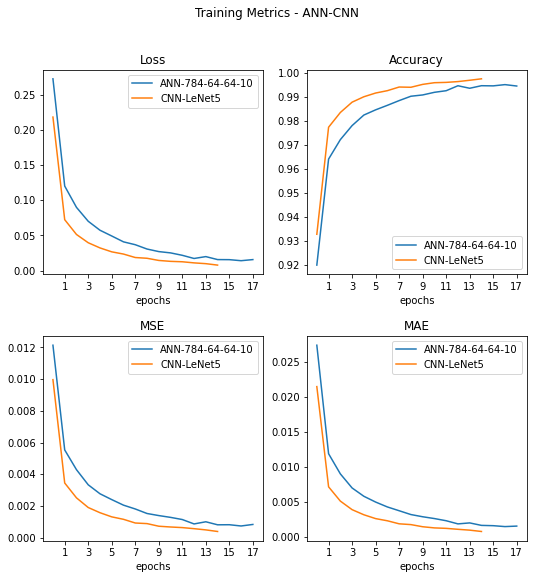

In [315]:
plot_training_histories(training_histories=[training_history_ANN, training_history_CNN], 
                        model_names=[MODEL_NAME_ANN, MODEL_NAME_CNN], file_name='ANN-CNN')

In [279]:
"""
METHOD: Predict and Prep real and predicted labels
"""
def prep_y_true_pred(model, x_test, y_test):
    y_pred_temp = model.predict(x_test)
    
    if len(y_test.shape) == 1:
        y_true = y_test
    else:
        y_true = np.argmax(y_test, axis = 1)
        
    if len(y_pred_temp.shape) == 1:
        y_pred = y_pred_temp
    else:
        y_pred = np.argmax(y_pred_temp, axis = 1)
    
    y_true = y_true.astype('int32')
    y_pred = y_pred.astype('int32')
    return (y_true, y_pred)

"""
METHOD: Show evaluation metrics over TEST data & estimate confusion matrix
The metrics are the following: Precision, Recall, F1-Score, Support.
"""
def conf_matrix_and_classification_report(y_true, y_pred, num_of_classes = 10, class_names = None):
    if class_names is None:
        class_names = [str(i) for i in range(num_of_classes)]
    
    conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
    for i in range(len(conf_matrix)):
        print(class_names[i] + ':', conf_matrix[i])
    print('-----------------------------------------------------')
    # Print the precision and recall, among other metrics
    print(sklearn.metrics.classification_report(y_true, y_pred, target_names = class_names))

In [280]:
print(f'Detailed Training Results of {MODEL_NAME_ANN} model')
y_true, y_pred = prep_y_true_pred(model_ANN, x_test.reshape(x_test.shape[0], -1), y_test)
conf_matrix_and_classification_report(y_true, y_pred)

print()

print(f'Detailed Training Results of {MODEL_NAME_CNN} model')
y_true, y_pred = prep_y_true_pred(model_CNN, x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)
conf_matrix_and_classification_report(y_true, y_pred)

Detailed Training Results of ANN-784-64-64-10 model
0: [969   1   3   0   0   0   1   2   3   1]
1: [   0 1129    1    1    0    0    1    0    3    0]
2: [   1    0 1017    3    2    0    3    2    4    0]
3: [  1   0   9 982   0   5   0   3   7   3]
4: [  1   1   6   0 962   0   4   1   2   5]
5: [  2   0   1   8   1 866   3   0   7   4]
6: [  3   2   1   1   4   6 940   0   1   0]
7: [  2   7  20   2   1   0   0 991   2   3]
8: [  4   0   6   4   4   1   0   5 950   0]
9: [  3   5   1   5  11   3   0   4   6 971]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98  

In [298]:
"""
METHOD: Print evaluation results with metrics: LOSS - Categorical Crossentrophy, ACC, MSE, MAE
"""
def print_test_scores(model, x_test, y_test):
    test_scores = model.evaluate(x_test, y_test, verbose=0)

    for i in range(len(test_scores)):
        metric_name = ''
        if i == 0:
            metric_name = 'Loss'
        else:
            metric_name = METRICS[i-1]
        print(f'{metric_name}: {test_scores[i]}')
            
print('Test Scores - ANN\n--------------------------')
print_test_scores(model_ANN, x_test.reshape(x_test.shape[0], -1), y_test)
print()
print('Test Scores - CNN\n--------------------------')
print_test_scores(model_CNN, x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)

Test Scores - ANN
--------------------------
Loss: 0.11329323798418045
accuracy: 0.9776999950408936
mse: 0.003819412551820278
mae: 0.004927079193294048

Test Scores - CNN
--------------------------
Loss: 0.034583061933517456
accuracy: 0.9922999739646912
mse: 0.0013603265397250652
mae: 0.0019016637234017253
